In [20]:
import numpy as np
import tikzplotlib
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

#Setting style options.
sns.set()
sns.set_style("whitegrid")
np.set_printoptions(3)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [19]:
beta_n_theta_n_0 = np.loadtxt('beta_n_theta_n_0.mat')
beta_n_theta_n_1 = np.loadtxt('beta_n_theta_n_1.mat')
beta_n_theta_n_2 = np.loadtxt('beta_n_theta_n_2.mat')

Capacity0 = np.loadtxt('Capacity0.mat')
Capacity1 = np.loadtxt('Capacity1.mat')
Capacity2 = np.loadtxt('Capacity2.mat')
Capacity3 = np.loadtxt('Capacity3.mat')

angle = np.linspace(-np.pi,np.pi,10000)
snr_db = [0, 5, 10, 15, 20, 25, 30]

In [28]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter
class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex
    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)
    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

<Figure size 432x288 with 0 Axes>

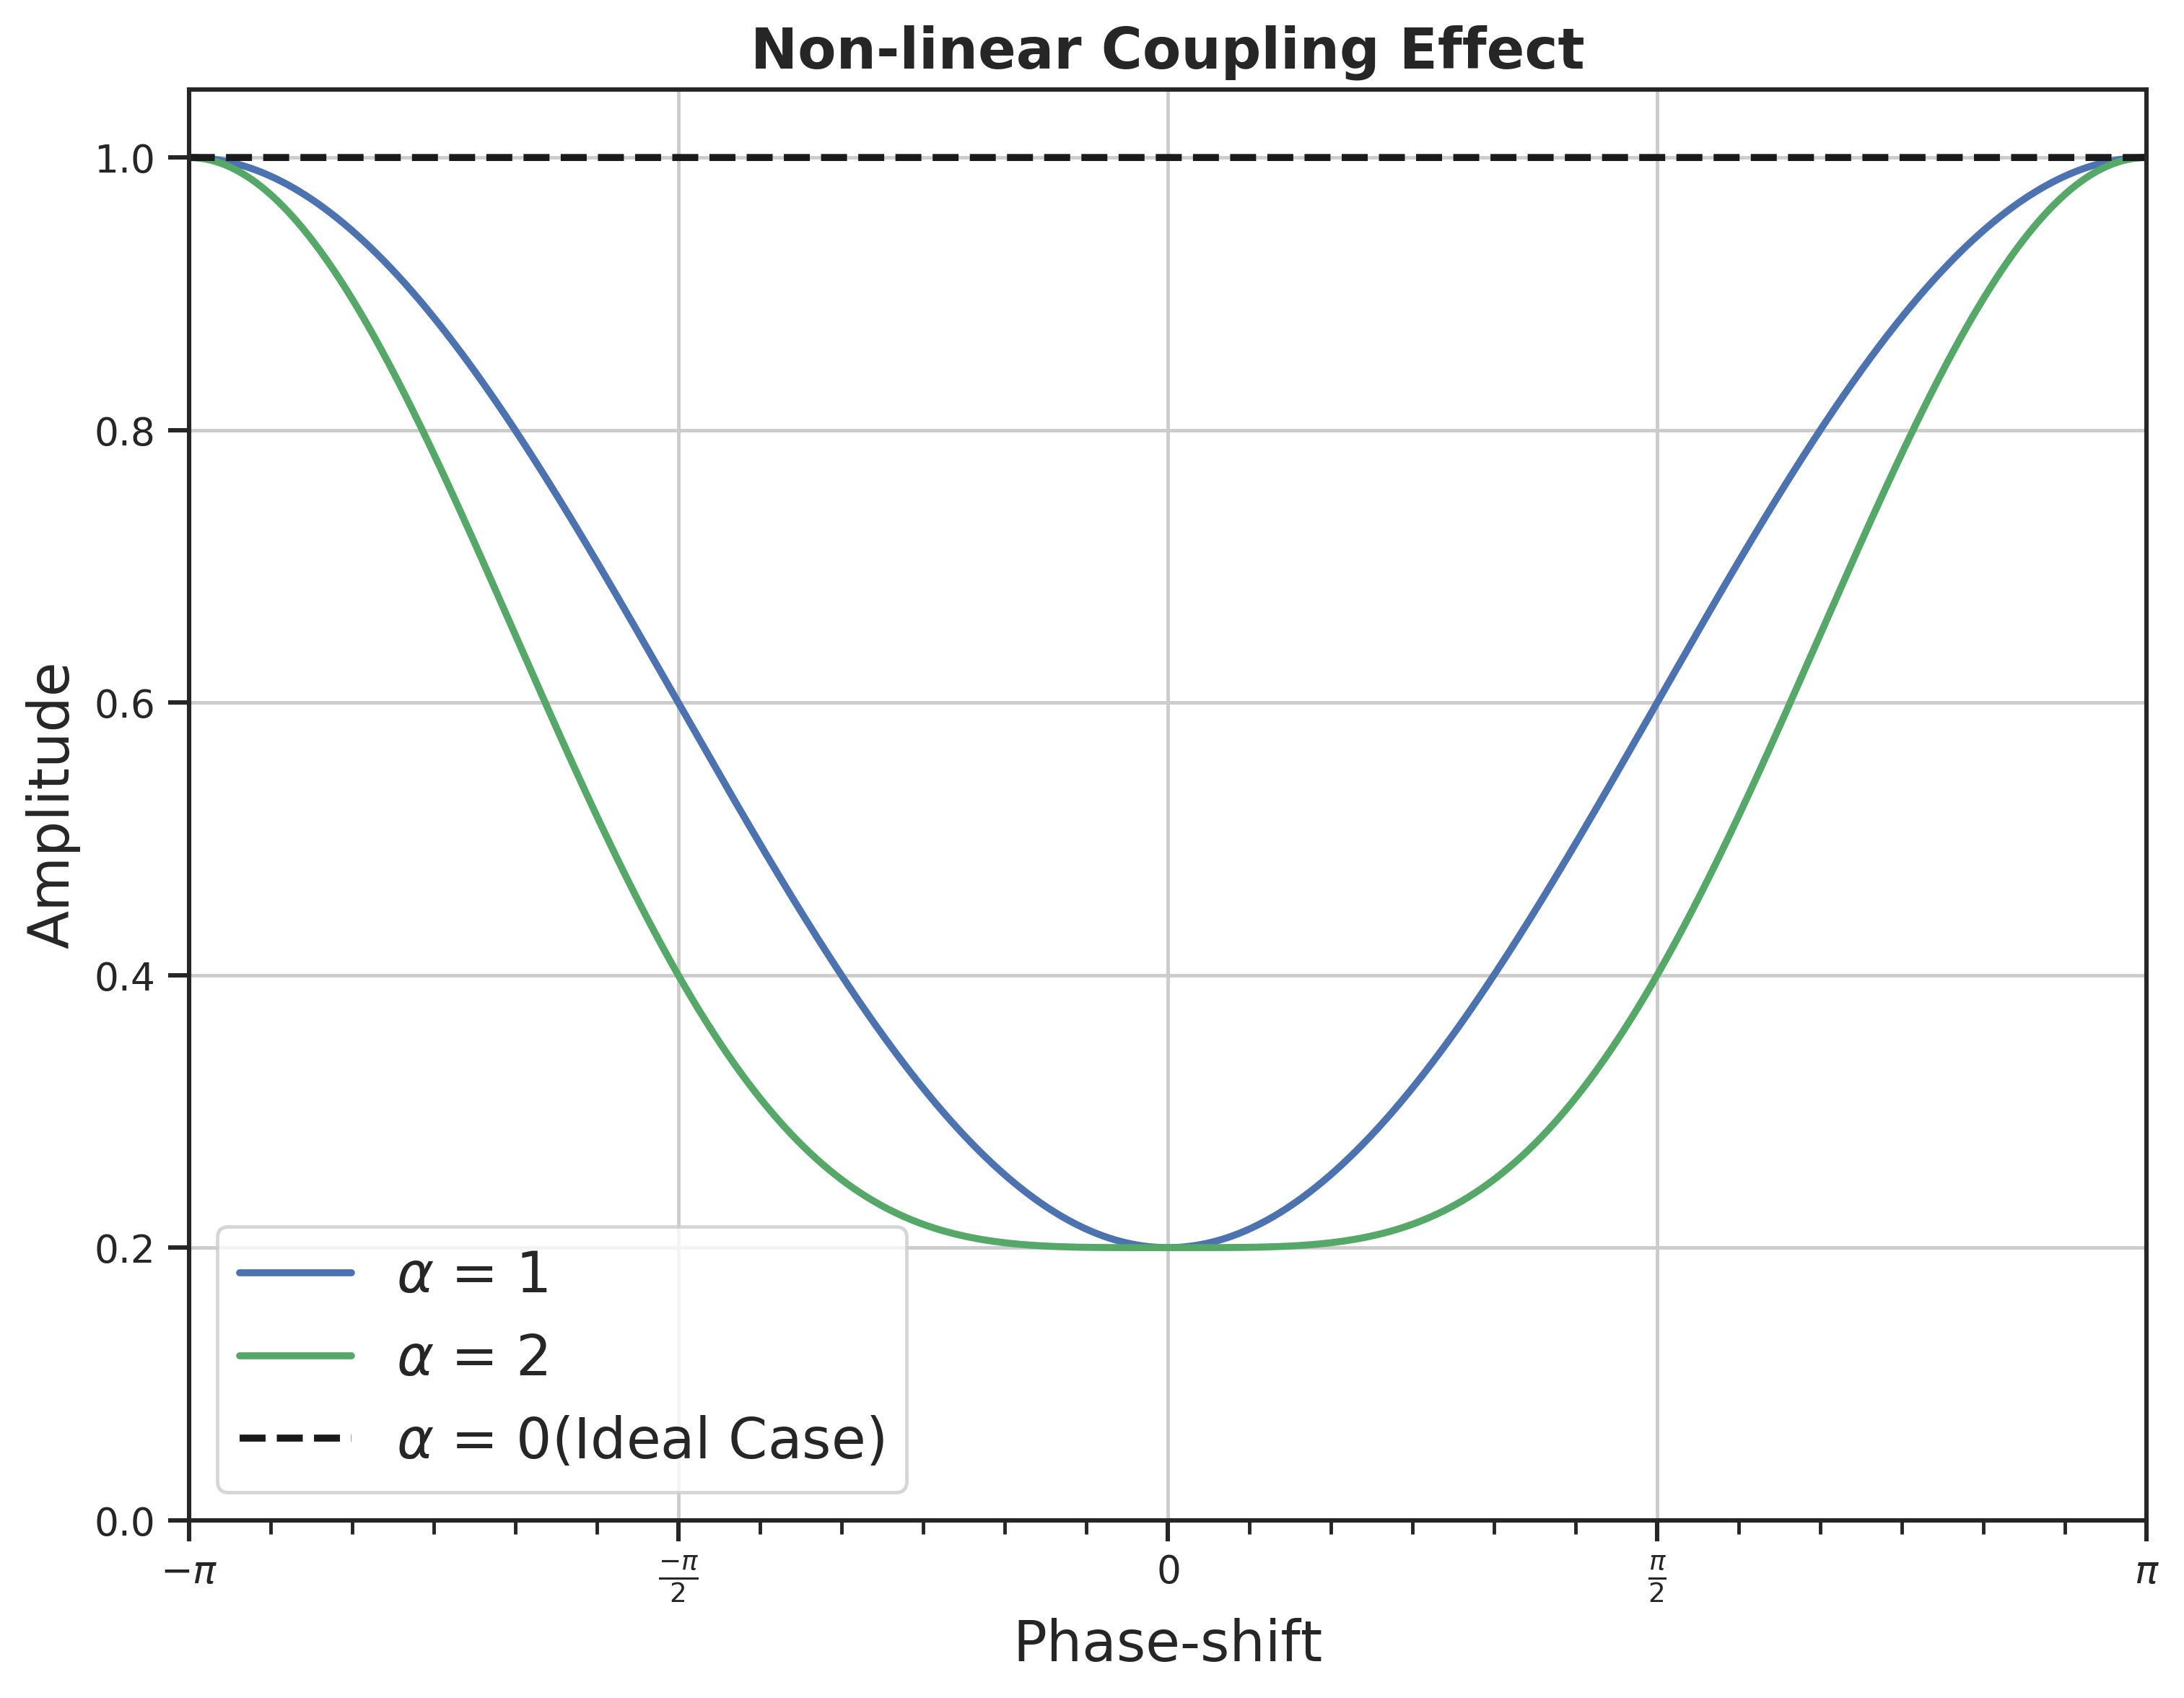

In [31]:
plt.figure()
plt.figure(figsize=(10, 7.5), dpi=350)

a, b = 8,2

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))



plt.plot(angle,beta_n_theta_n_1,'b', label = r'$\alpha$ = 1', fillstyle = 'full', markersize = a, linewidth = b)
plt.plot(angle,beta_n_theta_n_2,'g', label = r'$\alpha$ = 2', fillstyle = 'full', markersize = a, linewidth = b)
plt.plot(angle,beta_n_theta_n_0,'--k', label = r'$\alpha$ = 0(Ideal Case)', fillstyle = 'full', markersize = a, linewidth = b)

plt.title(r'Non-linear Coupling Effect', fontweight = 'bold', fontsize = 16)
plt.xlabel(r'Phase-shift', fontsize = 16)
plt.ylabel(r'Amplitude', fontsize = 16)

plt.xlim(-np.pi, np.pi)
plt.ylim(0, 1.05)

plt.grid()
plt.legend(fontsize = 16)
plt.savefig('2_amplitude_vs_phase_shift.pdf', format='pdf')

plt.show()

<Figure size 432x288 with 0 Axes>

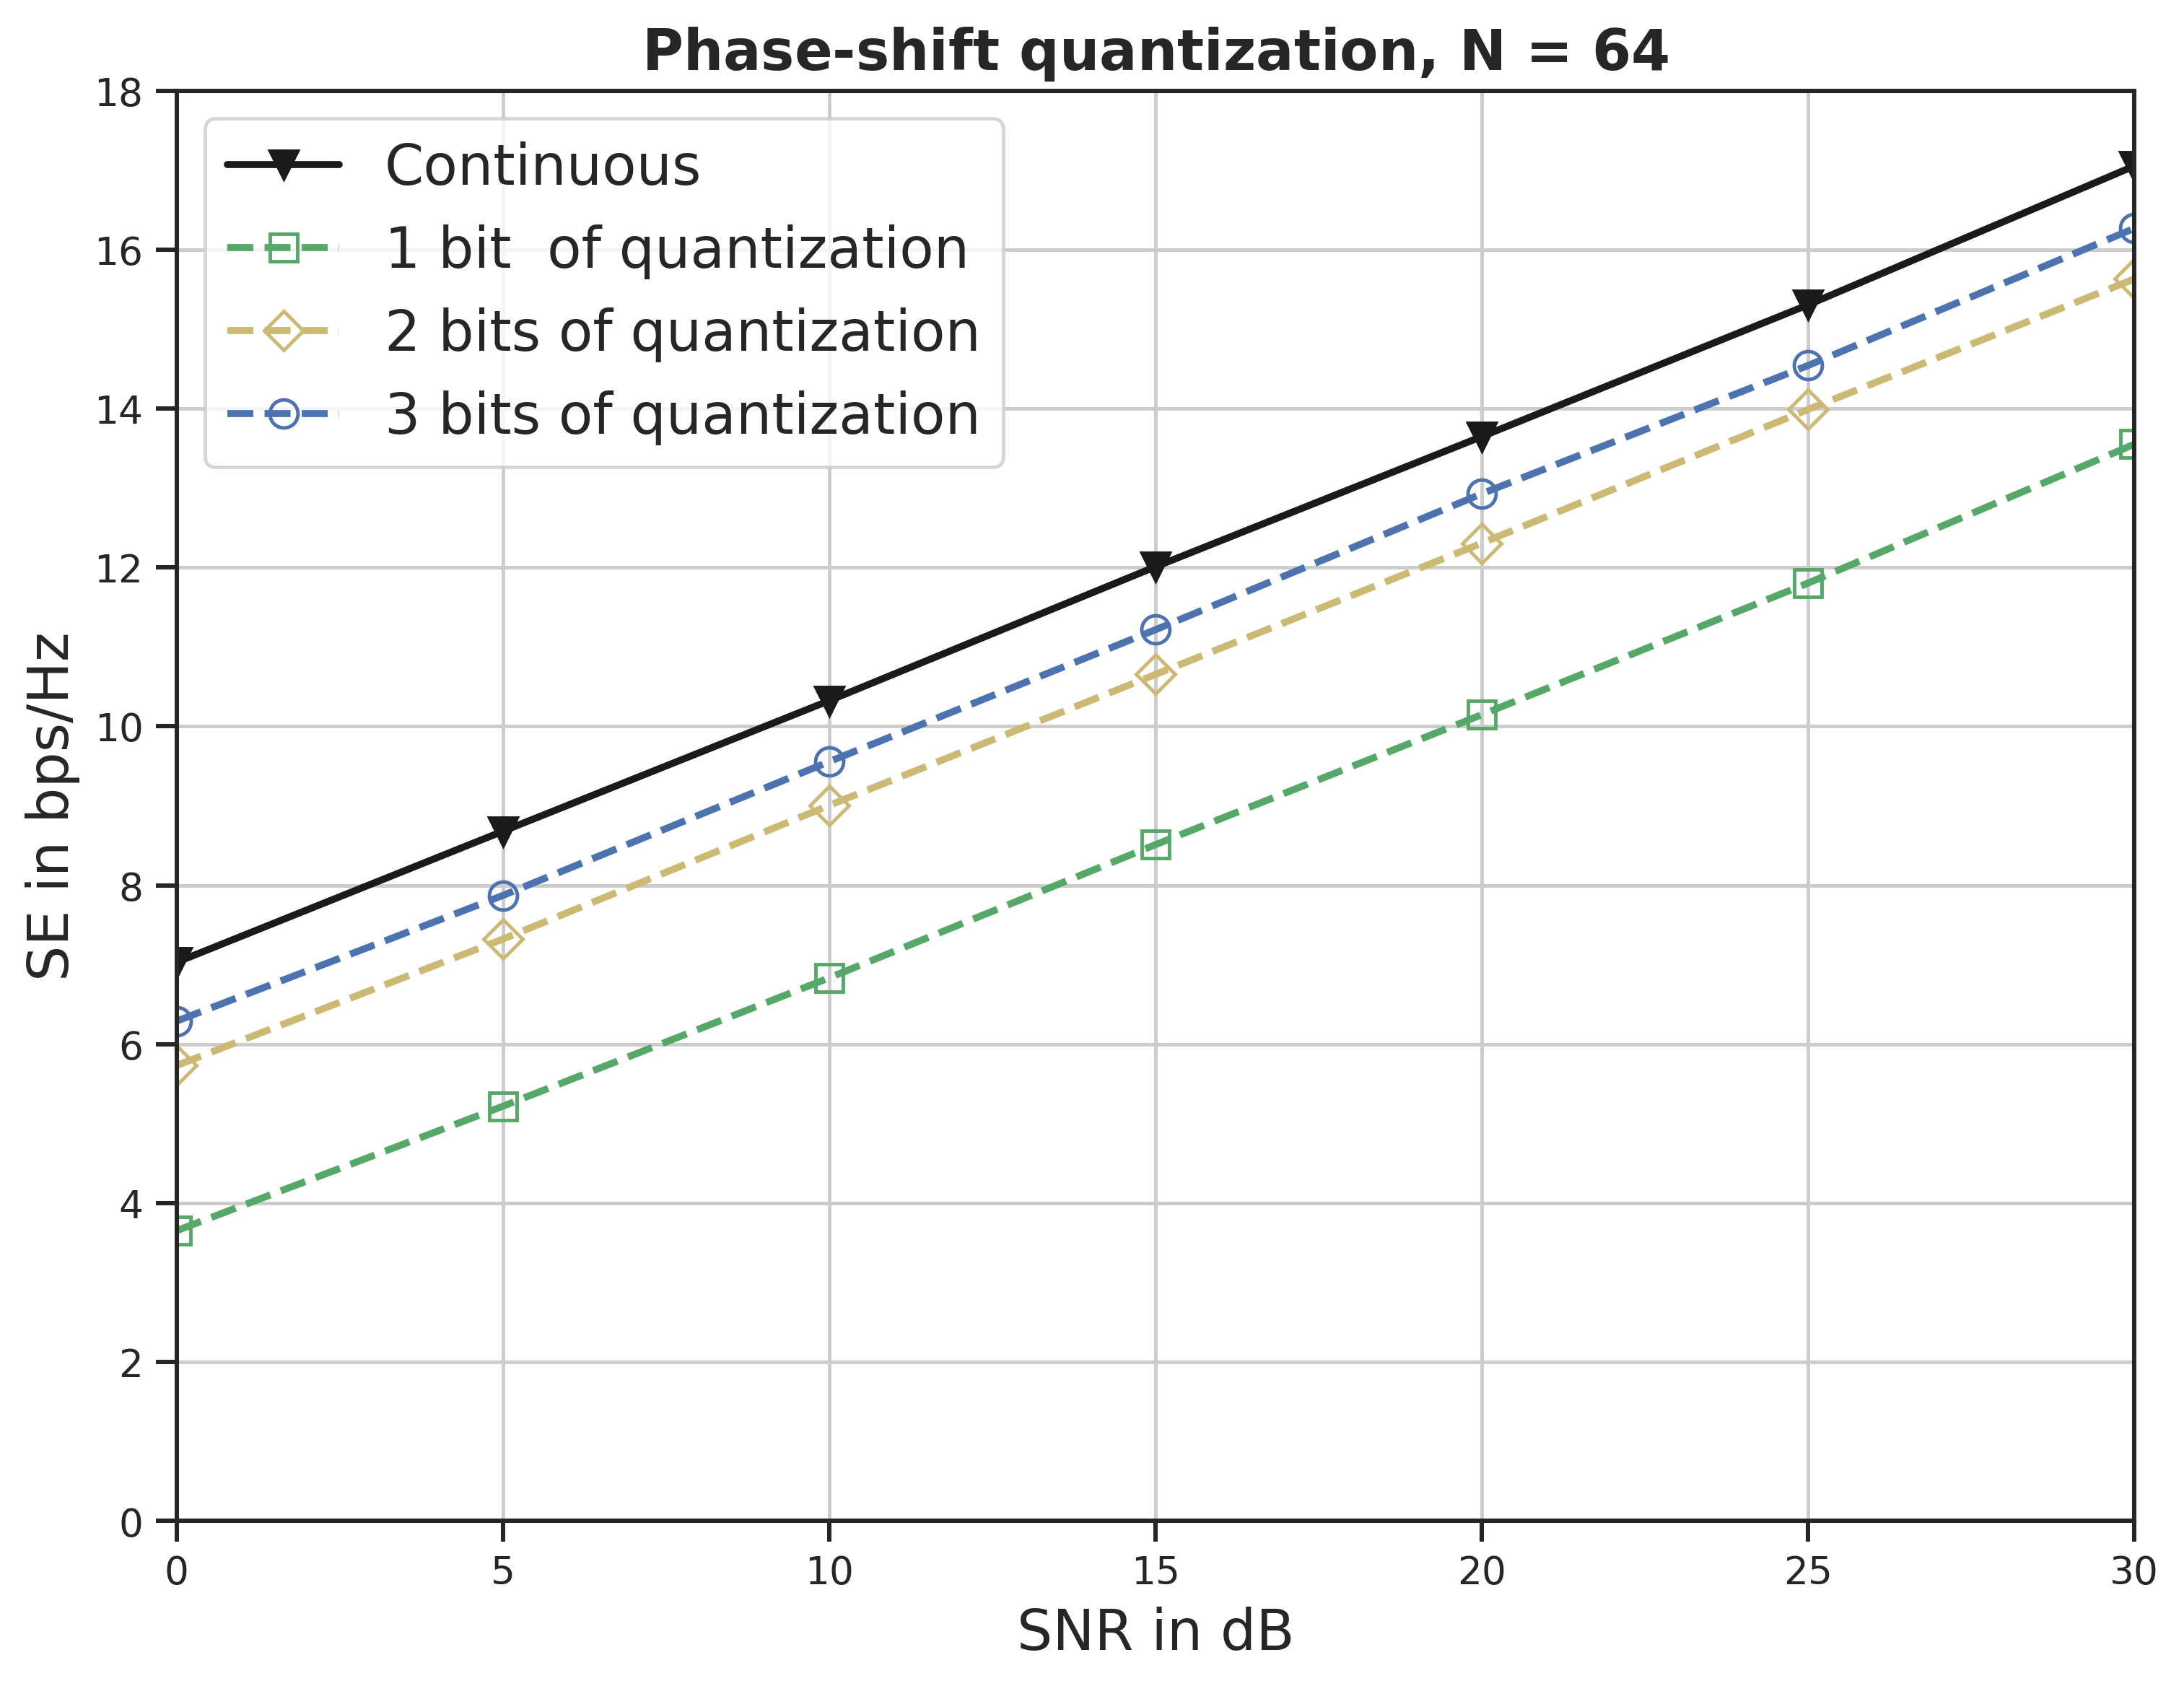

In [32]:
plt.figure()
plt.figure(figsize=(10, 7.5), dpi=350)

a, b = 8,2

plt.plot(snr_db,Capacity0,'-kv', label = 'Continuous', fillstyle = 'full', markersize = a, linewidth = b)
plt.plot(snr_db,Capacity1,'--gs', label = '1 bit  of quantization', fillstyle = 'none', markersize = a, linewidth = b)
plt.plot(snr_db,Capacity2,'--yD', label = '2 bits of quantization', fillstyle = 'none', markersize = a, linewidth = b)
plt.plot(snr_db,Capacity3,'--bo', label = '3 bits of quantization', fillstyle = 'none', markersize = a, linewidth = b)


plt.title('Phase-shift quantization, $\mathbf{N}$ = 64', fontweight = 'bold', fontsize = 16)
plt.xlabel('SNR in dB', fontsize = 16)
plt.ylabel('SE in bps/Hz', fontsize = 16)

plt.xlim(0, 30)
plt.ylim(0, 18)

plt.grid()
plt.legend(fontsize = 16)
plt.savefig('2_continuous_vs_discrete.pdf', format='pdf')
plt.show()
#tikzplotlib.save("3_system_model_interference_P.tex")